# Importing Dataset and essential libraries

In [1]:
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
dataset=pd.read_csv('titanic.csv')


# Dropping Irrelevant columns

In [3]:
new_dataset=dataset.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]


# replacing missing embarkment information

In [4]:
new_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [5]:
new_dataset["Embarked"]=new_dataset["Embarked"].fillna('S')

# Replacing missing age informations with the median

In [6]:
new_dataset.median()

Survived     0.0
Pclass       3.0
Age         28.0
SibSp        0.0
Parch        0.0
dtype: float64

In [7]:
new_dataset["Age"]=new_dataset["Age"].fillna(28)


In [8]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    
    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
    bottom, top = ax.get_ylim()
        
    ax.set_ylim(bottom + 0.5, top - 0.5)

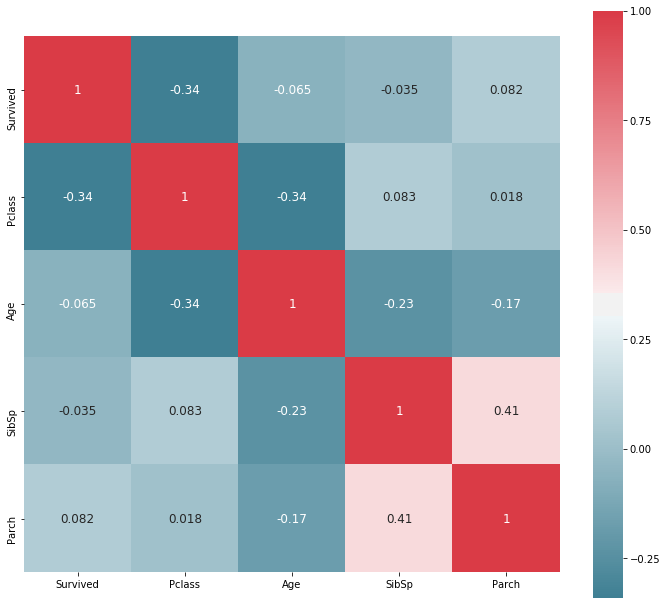

In [9]:
plot_correlation_map(new_dataset)

   ### this function allows us to visualise the correlation between all the values, there are 2 types of correlation positive and negative when the correlation between 2 values is positive their value drops or rise simultanouesly and if the correlation is negative one will rise while the other value drops. For exemple in the correlation table above when can deduce that  when the Pclass rises age drops or when SibSp rises Parch also rises so it help us study the impact of a value on all the others

In [10]:
new_dataset['title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
new_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title
0,0,3,male,22.0,1,0,S,Mr
1,1,1,female,38.0,1,0,C,Mrs
2,1,3,female,26.0,0,0,S,Miss
3,1,1,female,35.0,1,0,S,Mrs
4,0,3,male,35.0,0,0,S,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,Rev
887,1,1,female,19.0,0,0,S,Miss
888,0,3,female,28.0,1,2,S,Miss
889,1,1,male,26.0,0,0,C,Mr


In [11]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                    "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                   "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}

In [12]:
new_dataset['title']=new_dataset['title'].map(Title_Dictionary)


In [13]:
new_dataset['title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      4
Name: title, dtype: int64

# creating the column family size 

In [14]:
new_dataset['family_size']=new_dataset['SibSp']+new_dataset['Parch']+1

new_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title,family_size
0,0,3,male,22.0,1,0,S,Mrs,2
1,1,1,female,38.0,1,0,C,Mrs,2
2,1,3,female,26.0,0,0,S,Miss,1
3,1,1,female,35.0,1,0,S,Mrs,2
4,0,3,male,35.0,0,0,S,Mrs,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,Officer,1
887,1,1,female,19.0,0,0,S,Miss,1
888,0,3,female,28.0,1,2,S,Miss,4
889,1,1,male,26.0,0,0,C,Mrs,1


In [15]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null object
title          890 non-null object
family_size    891 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


# Logistic regression

In [16]:
new_dataset=new_dataset.drop(columns="title")
new_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family_size
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
888,0,3,female,28.0,1,2,S,4
889,1,1,male,26.0,0,0,C,1


In [17]:
new_dataset=new_dataset.loc[:,['Survived','Pclass','Sex','Age','family_size','Embarked']]
new_dataset['Sex']=new_dataset['Sex'].map({'male' : 0,'female' : 1})
new_dataset['Embarked']=new_dataset['Embarked'].map({'C':0,'S':1,'Q':2})


new_dataset

,Survived,Pclass,Sex,Age,family_size,Embarked
0,0,3,0,22.0,2,1
1,1,1,1,38.0,2,0
2,1,3,1,26.0,1,1
3,1,1,1,35.0,2,1
4,0,3,0,35.0,1,1
...,...,...,...,...,...,...
886,0,2,0,27.0,1,1
887,1,1,1,19.0,1,1
888,0,3,1,28.0,4,1
889,1,1,0,26.0,1,0


# Decision tree classification

In [18]:
y=new_dataset['Survived']
x=new_dataset.drop(columns='Survived')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

## creating decision tree model

In [43]:
tree_one = tree.DecisionTreeClassifier()
tree_one.fit(x_train,y_train)
y_pred = tree_one.predict(x_test)
print('Score: {}'.format(tree_one.score(x_train, y_train)))

Score: 0.9452247191011236


## decision tree plot

In [20]:
import graphviz
dot_data= tree.export_graphviz(tree_one,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("dataset")

'dataset.pdf'

# decision tree parameter (max and min depth)

In [40]:
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=2,max_depth=9)
dtree=dtree.fit(x_train,y_train)
print('Score: {}'.format(dtree.score(x_train, y_train)))

Score: 0.8103932584269663


# by chaning the max and min of depth the new accuracy is worse than the original


# changing random forest estimators

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))


accuracy: 0.7932960893854749
